Assignment for the second session complete today Ex1: Participant Exercise Download the daily stock price of four or five randomly selected stocks from very different sectors or industries for the last 6 months. (Each of these stocks should have been taken from different industry sectors.)

    Find out the outlier events (date and the gain or loss) for each of these stocks based on box plot analysis.
    Find out the correlation of daily gains of each of these stocks.
    Draw the scatter plots and the heatmap.


Tata Chem: Min Gain -3.867754284906615, Max Gain 3.519279144661573
Tata Chem outliers:             Close Price  Open Price      gain
Date                                         
2022-09-12      1159.20     1116.00  3.870968
2022-09-22      1151.10     1085.05  6.087277
2023-02-06      1006.45      970.00  3.757732
Maruti Suzuki: Min Gain -2.9169497408040708, Max Gain 2.652239317661844
Maruti Suzuki Outliers:             Close Price  Open Price      gain
Date                                         
2022-09-15       9245.2      9000.0  2.724444
2022-10-28       9494.1      9054.4  4.856203
2023-01-24       8698.6      8435.0  3.125074
Titan: Min Gain -3.2850319027764607, Max Gain 2.917347713993341
Titan Outliers:             Close Price  Open Price      gain
Date                                         
2022-09-22      2737.90     2642.00  3.629826
2022-09-30      2606.55     2528.30  3.094965
2023-02-03      2463.20     2315.05  6.399430
Dmart: Min Gain -3.712059100041391, Max Gain 3.

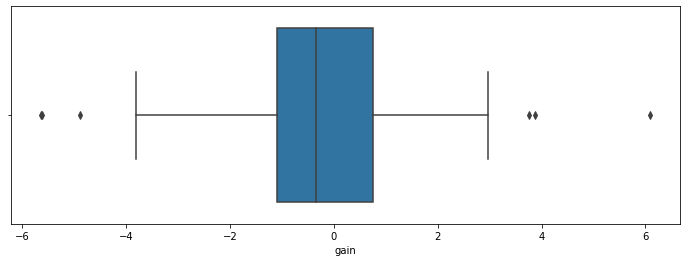

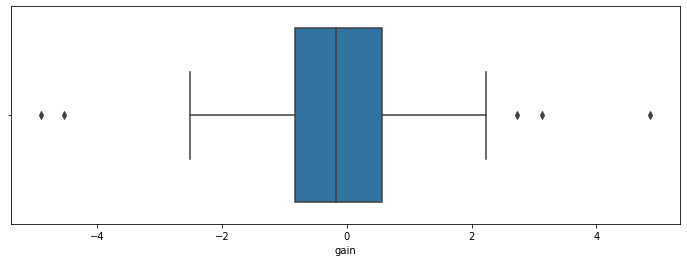

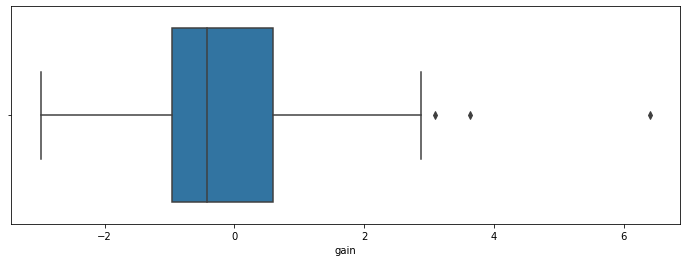

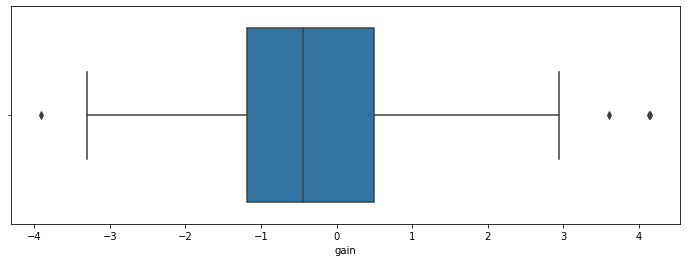

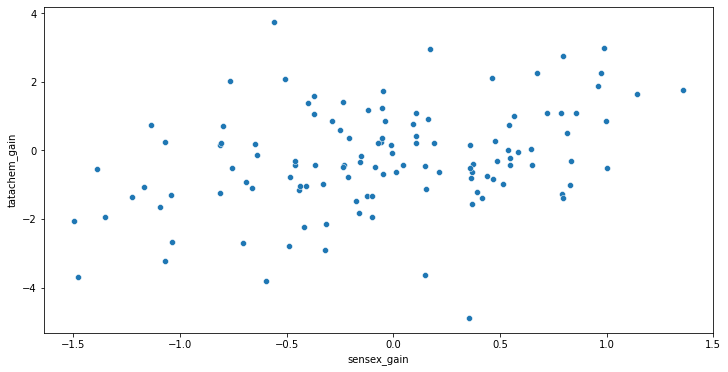

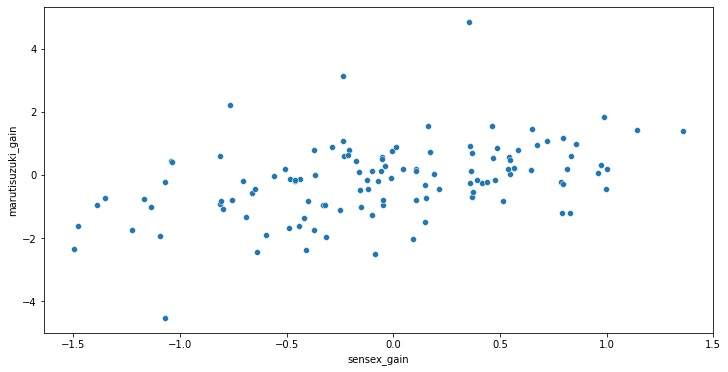

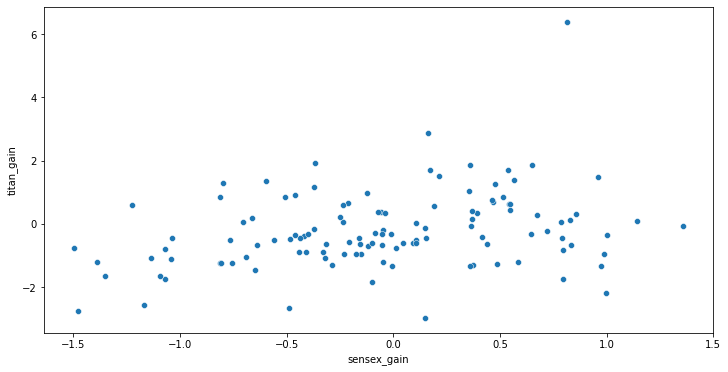

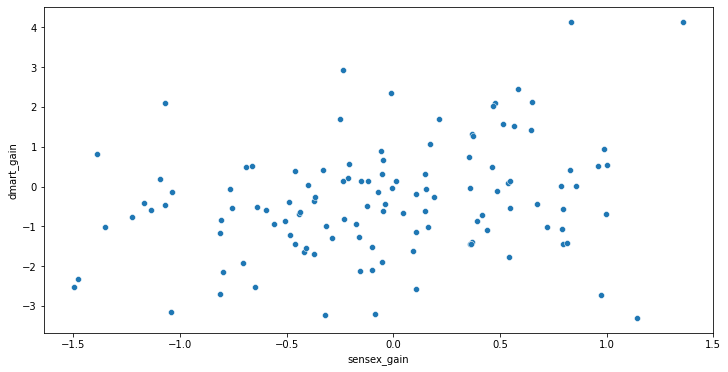

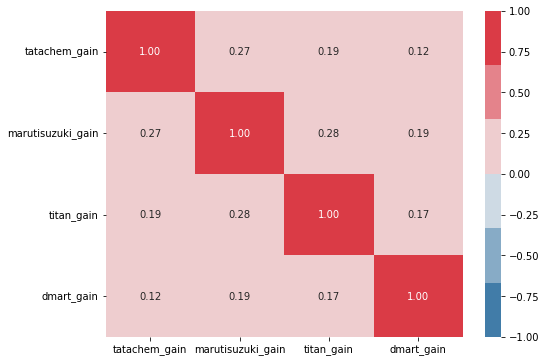

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

DATA_PATH = 'https://raw.githubusercontent.com/jnarin/MLCourse_assignments/main/resources/'

def get_sector_gain(filename):
    df = pd.read_csv(filename, index_col = False, parse_dates=['Date'])
    df = df.set_index(['Date'], drop=True)
    df.sort_index(ascending = True, inplace=True)

    df['gain'] = ((df['Close Price'] - df['Open Price']) * 100 / df['Open Price'])

    return df[['Close Price', 'Open Price', 'gain']]

def draw_scatter_plot(title, df, gain):
  plt.figure(figsize=(12, 6))
  sn.scatterplot(data = df, x = 'sensex_gain', y = gain)

def draw_box_plot(title, gain):
  plt.figure(figsize=(12,4))
  sn.boxplot(x = gain, orient = 'h')

def find_outliers(title, gain):
  gain_stats = gain.describe()
  iqr = stats.iqr(gain)
  min_gain = gain_stats['25%'] - 1.5 * iqr
  max_gain = gain_stats['75%'] + 1.5 * iqr
  return min_gain, max_gain
  
sensex_df = pd.read_csv(DATA_PATH+"SENSEX.csv",
                        index_col=False, 
                        parse_dates=['Date'])
sensex_df = sensex_df.set_index('Date', drop=True)
sensex_df['sensex_gain'] = (sensex_df.Close - sensex_df.Open)*100/sensex_df.Open

# Calculate gain
tatachem_df = get_sector_gain(DATA_PATH+"500770_TATACHEM.csv")
marutisuzuki_df = get_sector_gain(DATA_PATH+"532500_MARUTI_SUZUKI.csv")
titan_df = get_sector_gain(DATA_PATH+"500114_TITAN.csv")
dmart_df = get_sector_gain(DATA_PATH+"540376_DMART.csv")

# Draw Box Plot
draw_box_plot("Tata Chem", tatachem_df['gain'])
draw_box_plot("Maruti Suzuki", marutisuzuki_df['gain'])
draw_box_plot("Titan", titan_df['gain'])
draw_box_plot("DMart", dmart_df['gain'])

# Find min & max gain, print outliers
min_gain, max_gain = find_outliers("Tata Chem", tatachem_df['gain'])
print(f"Tata Chem: Min Gain {min_gain}, Max Gain {max_gain}")
print(f"Tata Chem outliers: {tatachem_df[tatachem_df['gain'] > max_gain]}")

min_gain, max_gain = find_outliers("Maruti Suzuki", marutisuzuki_df['gain'])
print(f"Maruti Suzuki: Min Gain {min_gain}, Max Gain {max_gain}")
print(f"Maruti Suzuki Outliers: {marutisuzuki_df[marutisuzuki_df['gain'] > max_gain]}")

min_gain, max_gain = find_outliers("Titan", titan_df['gain'])
print(f"Titan: Min Gain {min_gain}, Max Gain {max_gain}")
print(f"Titan Outliers: {titan_df[titan_df['gain'] > max_gain]}")

min_gain, max_gain = find_outliers("Dmart", dmart_df['gain'])
print(f"Dmart: Min Gain {min_gain}, Max Gain {max_gain}")
print(f"DMart Outliers: {dmart_df[dmart_df['gain'] > max_gain]}")

# Add gain to sensex table
sensex_df['tatachem_gain'] = tatachem_df['gain']
sensex_df['marutisuzuki_gain'] = marutisuzuki_df['gain']
sensex_df['titan_gain'] = titan_df['gain']
sensex_df['dmart_gain'] = dmart_df['gain']

# Draw scatter plots
draw_scatter_plot("Tata Chem", sensex_df, 'tatachem_gain')
draw_scatter_plot("Maruti Suzuki", sensex_df, 'marutisuzuki_gain')
draw_scatter_plot("Titan", sensex_df, 'titan_gain')
draw_scatter_plot("DMart", sensex_df, 'dmart_gain')

# Compute correlation
sector_corr = sensex_df[['tatachem_gain', 
                         'marutisuzuki_gain', 
                         'titan_gain',
                         'dmart_gain']].corr()
print(f"Correlation: {sector_corr}")

# Draw heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(sector_corr,
           annot = True,
           fmt = "0.2f",
           cmap = sn.diverging_palette(240, 10),
           vmin = -1.0, 
           vmax = 1.0);




